In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Startup_funding.csv')
df

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
...,...,...,...,...,...,...,...,...,...,...
3039,3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3040,3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3041,3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
3042,3043,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [4]:
df.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD', 'Remarks'],
      dtype='object')

In [5]:
df.columns = ['SrNo','Date','StartupName','IndustryVertical','SubVertical','City',
              'InvestorsName','InvestmentType','AmountinUSD','Remarks']
df.columns

Index(['SrNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical',
       'City', 'InvestorsName', 'InvestmentType', 'AmountinUSD', 'Remarks'],
      dtype='object')

In [6]:
df.shape

(3044, 10)

In [7]:
# #clean string
def clean_string(x):
    return str(x).replace("\\Xc2\\XaO","").replace("\\\\Xc2\\\\XaO","")

# #apply function to clean data
for col in ["StartupName","IndustryVertical","SubVertical","City","InvestorsName","InvestmentType","AmountinUSD","Remarks"]:
    df[col]=df[col].apply(lambda x:clean_string(x))


df.head()

,SrNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountinUSD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",nan
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",nan
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",nan
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",nan
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",nan


In [8]:
#data cleaning
#misssing data
import warnings
warnings.filterwarnings('ignore')

#missing values in data
total = df.isnull().sum().sort_values(ascending = False)

#percent
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)

missing_data = pd.concat([total,percent],axis = 1,keys=['Total','percent %'])

missing_data

,Total,percent %
Remarks,0,0.0
AmountinUSD,0,0.0
InvestmentType,0,0.0
InvestorsName,0,0.0
City,0,0.0
SubVertical,0,0.0
IndustryVertical,0,0.0
StartupName,0,0.0
Date,0,0.0
SrNo,0,0.0


In [9]:
#check values in remarks column
df['Remarks'].value_counts()

nan                                           2625
Series A                                       175
Series B                                        63
Pre-Series A                                    37
Series C                                        28
                                              ... 
Series E                                         1
thru Accelerator                                 1
Series G (Check prev funding details here)       1
pre-series A                                     1
Strategic Investment (Majority Stake)            1
Name: Remarks, Length: 73, dtype: int64

In [10]:
# remove remarks
df = df.drop(['Remarks'],axis=1)

In [11]:
df.columns

Index(['SrNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical',
       'City', 'InvestorsName', 'InvestmentType', 'AmountinUSD'],
      dtype='object')

In [12]:
#clean the amount col

def clean_amount(x):
    x = ''.join([c for c in str(x) if c in ['0','1','2','3','4','5','6','7','8','9']])
    x = str(x).replace(",","").replace("+","")
    x = str(x).lower().replace("undisclosed","")
    x = str(x).lower().replace("n/a","")
    if x == " " :
        x = '-999'
    return x

#apply the function

df['AmountinUSD'] = df['AmountinUSD'].apply(lambda x :clean_amount(x))



              

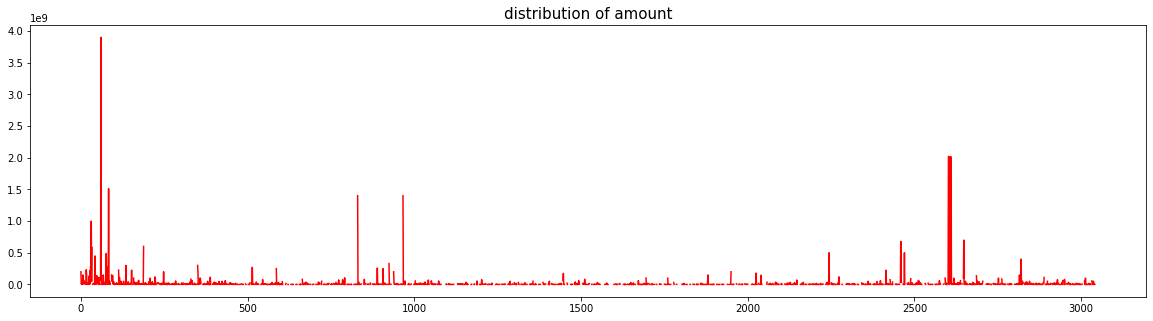

In [13]:
df['AmountinUSD'] = pd.to_numeric(df['AmountinUSD'])
#check after cleaning

plt.rcParams['figure.figsize']=(20,5)
df['AmountinUSD'].plot(kind ='line',color ='red')
plt.title('distribution of amount',fontsize=15)
plt.show()

In [14]:
#cleaning the dates
df['Date'].loc[df['Date']=='12/05.2015'] = '12/05/2015'
df['Date'].loc[df['Date']=='13/04.2015'] = '13/04/2015'
df['Date'].loc[df['Date']=='15/01.2015'] = '15/01/2015'
df['Date'].loc[df['Date']=='22/01//2015'] = '22/01/2015'
df['Date'].loc[df['Date']=='05/072018'] = '05/07/2018'
df['Date'].loc[df['Date']=='01/07/015'] = '01/07/2015'
df.loc[df['Date']=='\\\\xc2\\\\xa010/07/015'] = '10/07/2015'


# how does funding system changes with respect to time

In [15]:
# df['Date']['\\xc2\\xa010/7/2015'].drop()
df.drop(df.loc[df['Date']=='\\xc2\\xa010/7/2015'].index, inplace=True)

In [16]:
#convertin into data time object
df['yearmonth']=(pd.to_datetime(df['Date'],
            format='%d/%m/%Y').dt.year*100)+(pd.to_datetime(df['Date'],format='%d/%m/%Y').dt.month)


temp = df['yearmonth'].value_counts().sort_values(ascending=False).head(10)
print("number of funding per month in decreasing order(Top 10)\n",temp)
year_month = df['yearmonth'].value_counts()

ValueError: time data '\\xc2\\xa010/7/2015' does not match format '%d/%m/%Y' (match)

In [17]:
# plot data
plt.rcParams['figure.figsize']=(15,7)
sns.barplot(year_month.index,year_month.values,palette='copper')
plt.xticks(rotation=90)
plt.xlabel("year-month transacton",fontsize=12)
plt.ylabel("number of fundings made",fontsize=12)
plt.title("year-month distribution",fontsize=16)
plt.show()

NameError: name 'year_month' is not defined

# general amount startups get in india


In [18]:
#check max funding for startups
print("maximum funding to a startup is :",df["AmountinUSD"].dropna().sort_values().max())

maximum funding to a startup is : 3900000000.0


In [19]:
#check startups with more than 50cr+ funding
from ipywidgets import interact, interactive, fixed, interact_manual
@interact
def check(column='AmountinUSD',x=500000000):
    return df[df[column]>x].sort_values(by='AmountinUSD',ascending = False)

interactive(children=(Text(value='AmountinUSD', description='column'), IntSlider(value=500000000, description=…

In [20]:
#check different ventures of paytm
df[df.StartupName == 'Paytm']

,SrNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountinUSD
31,32,25/11/2019,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding Round,1e+09
251,252,26/06/2018,Paytm,Technology,Digital Payment Platform,Noida,One 97 Communications,Private Equity,8.95e+06
830,831,18/05/2017,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.4e+09
1493,1494,30/08/2016,Paytm,eCommerce,Mobile Wallet & ECommerce platform,Bangalore,MediaTek Inc.,Private Equity,6e+07
2459,2460,29/09/2015,Paytm,E-Commerce & M-Commerce platform,nan,New Delhi,"Alibaba Group, Ant Financial",Private Equity,6.8e+08
2890,2891,13/03/2015,Paytm,nan,nan,nan,Ratan Tata,Private Equity,NaN
2948,2949,05/02/2015,Paytm,nan,nan,nan,Ant Financial Services (Alipay),Private Equity,NaN


In [21]:
# minimum funding in startup
print("minimum startup funding is:",df['AmountinUSD'].dropna().sort_values().min())

minimum startup funding is: 20.0


In [22]:
# startup with least funding
df[['AmountinUSD','StartupName']].sort_values(by='AmountinUSD',ascending=True).head(5)

,AmountinUSD,StartupName
2613,20,Zenify
2605,20,\\xc2\\xa0Notesgen
2604,20,\\xc2\\xa0Shopsity
2611,20,\\xc2\\xa0Satvacart
3021,16000,CBS


In [23]:
#startup with no funding
df[df['AmountinUSD']==20.0].shape

(4, 9)

In [24]:
#Average funding

print(" on average startups got funding of :",df['AmountinUSD'].dropna().sort_values().mean())

 on average startups got funding of : 23415997.812229175


In [25]:
# no. of fundings each startup gets
print("total startup funded:",len(df['StartupName'].unique()))
print(df['StartupName'].value_counts().head(10))
startupname = df['StartupName'].value_counts().head(20)

total startup funded: 2459
Ola Cabs     8
Swiggy       8
Paytm        7
UrbanClap    6
Meesho       6
NoBroker     6
Nykaa        6
Medinfi      6
Uniphore     5
Jugnoo       5
Name: StartupName, dtype: int64


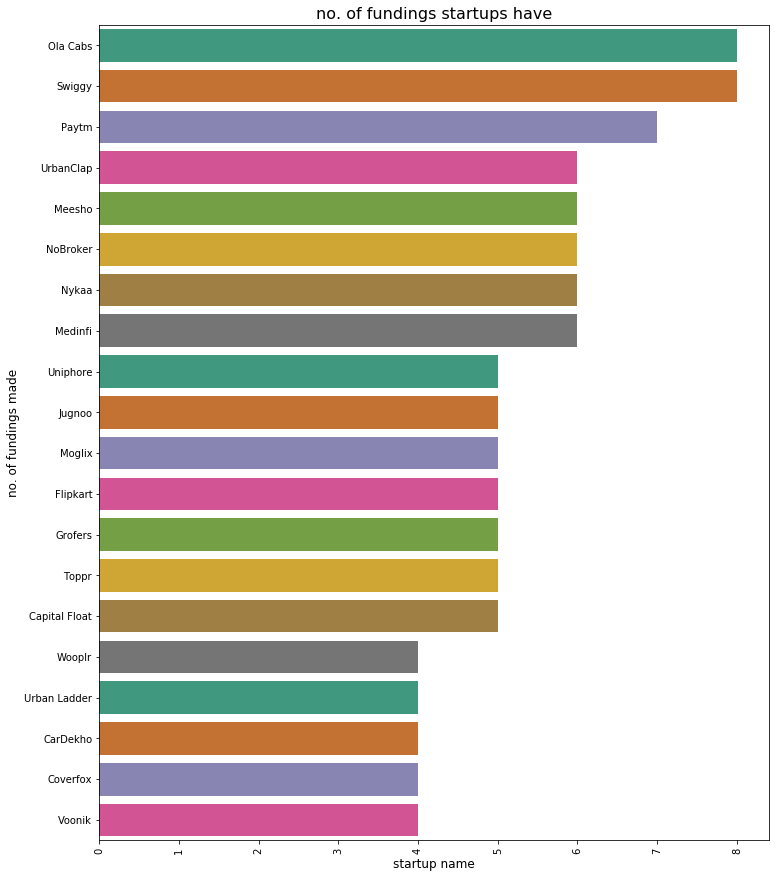

In [26]:
# plot this data

plt.rcParams['figure.figsize']=(12,15)
sns.barplot(y = startupname.index,x = startupname.values,alpha=0.9,palette='Dark2')
plt.xticks(rotation='vertical')
plt.xlabel("startup name",fontsize=12)
plt.ylabel("no. of fundings made",fontsize=12)
plt.title("no. of fundings startups have",fontsize=16)
plt.show()

# industry more preferred for startup

In [27]:
#analyze industry of startup
# data cleaning

df['IndustryVertical']=df['IndustryVertical'].replace('nan','consumer technology')
industry = df['IndustryVertical'].value_counts().head(10)
print(industry)

Consumer Internet      941
Technology             478
eCommerce              186
consumer technology    171
Healthcare              70
Finance                 62
ECommerce               61
Logistics               32
E-Commerce              29
Education               24
Name: IndustryVertical, dtype: int64


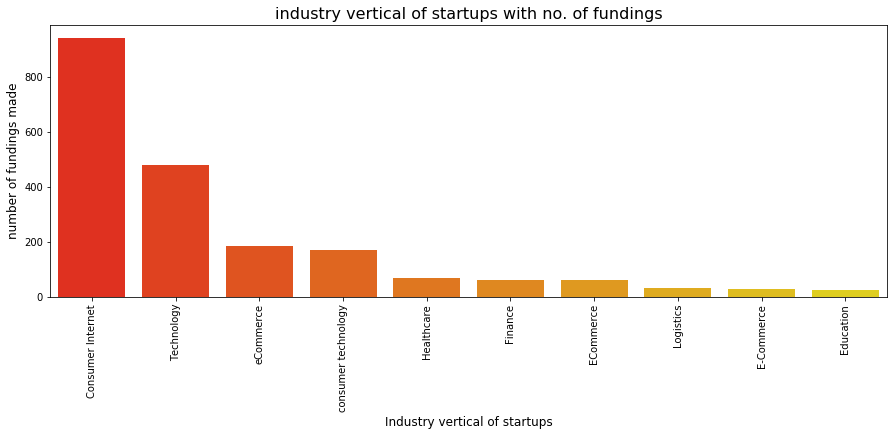

In [28]:
# plot the data
plt.rcParams['figure.figsize']=(15,5)
sns.barplot(industry.index,industry.values,palette='autumn')
plt.xticks(rotation='vertical')
plt.xlabel("Industry vertical of startups",fontsize=12)
plt.ylabel("number of fundings made",fontsize=12)
plt.title("industry vertical of startups with no. of fundings",fontsize=16)
plt.show()

Online Lending Platform                          11
Online Pharmacy                                  10
Food Delivery Platform                            8
Online lending platform                           5
Education                                         5
Online Learning Platform                          5
Online Lending                                    5
Online Education Platform                         5
Online Food Delivery                              4
Non-Banking Financial Company                     4
Agri-tech                                         3
Online platform for Higher Education Services     3
ECommerce Marketplace                             3
B2B Marketplace                                   3
Online Marketplace                                3
E-learning                                        3
Data Analytics platform                           3
Online learning platform                          3
Online Insurance Aggregator                       3
Online Furni

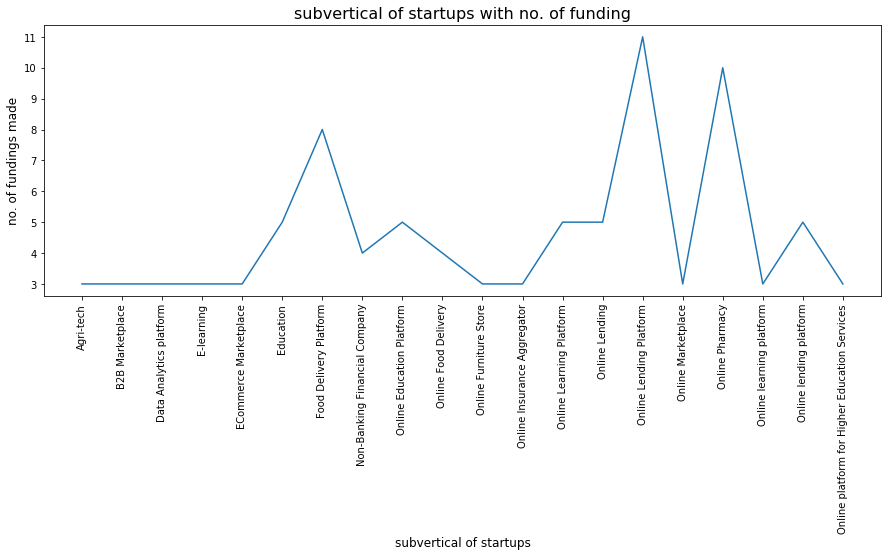

In [29]:
# analyze sub-vertical industries
industry=df['SubVertical'].value_counts()[1:].head(20)
print(industry)

#plot data
plt.rcParams['figure.figsize']=(15,5)
sns.lineplot(industry.index,industry.values,palette='winter')
plt.xticks(rotation='vertical')
plt.xlabel("subvertical of startups",fontsize=12)
plt.ylabel("no. of fundings made",fontsize=12)
plt.title("subvertical of startups with no. of funding",fontsize=16)
plt.show()

# Does location play a role in determing growth of startups

Bangalore    1021
Mumbai        567
New Delhi     421
Gurgaon       287
Pune          105
Hyderabad      99
Chennai        97
Noida          92
Gurugram       50
Ahmedabad      38
Name: City, dtype: int64


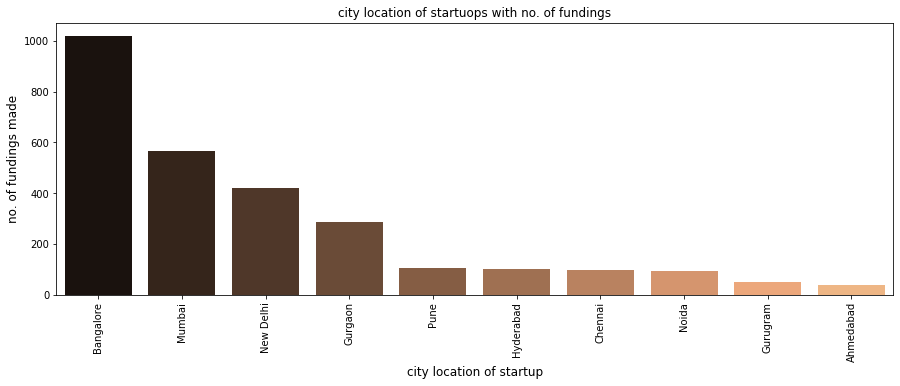

In [30]:
#analyze the effect of cities on a startup
# clean for better analysis
df['City']=df['City'].replace(('Bengaluru','nan'),('Bangalore','Bangalore'))
city = df['City'].value_counts().head(10)
print(city)

# plot data

sns.barplot(city.index,city.values,palette='copper')
plt.xticks(rotation='vertical')
plt.xlabel("city location of startup",fontsize=12)
plt.ylabel("no. of fundings made",fontsize=12)
plt.title("city location of startuops with no. of fundings")
plt.show()

# who plays main role in startup ecosystem

In [36]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


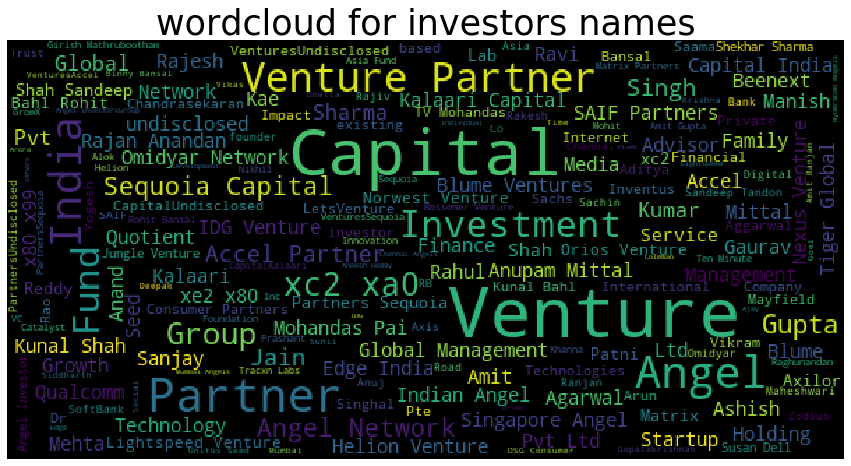

In [32]:
from wordcloud import WordCloud
names=df['InvestorsName'][~pd.isnull(df['InvestorsName'])]
wordcloud = WordCloud(max_font_size=50,width=600,height=300,background_color='black').generate(''.join(names))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("wordcloud for investors names",fontsize=35)
plt.axis('off')
plt.show()

In [33]:
# analyze investors in startup
# clean data
df['InvestorsName'][df['InvestorsName']=='Undisclosed investors']='Undisclosed Investors'
df['InvestorsName'][df['InvestorsName']=='undisclosed Investors']='Undisclosed Investors'
df['InvestorsName'][df['InvestorsName']=='undisclosed investors']='Undisclosed Investors'
df['InvestorsName'][df['InvestorsName']=='Undisclosed investor']='Undisclosed Investors'
df['InvestorsName'][df['InvestorsName']=='undisclosed Investors']='Undisclosed Investors'
df['InvestorsName'][df['InvestorsName']=='Undisclosed']='Undisclosed Investors'
df['InvestorsName'][df['InvestorsName']=='undisclosed']='Undisclosed Investors'
df['InvestorsName'][df['InvestorsName']=='nan']='Undisclosed Investors'

In [36]:
#check value counts
investors = df['InvestorsName'].value_counts().head(10)
print(investors)

Undisclosed Investors       124
Ratan Tata                   25
Indian Angel Network         23
Kalaari Capital              16
Sequoia Capital              15
Group of Angel Investors     15
Accel Partners               12
Undisclosed Investor         12
Venture Catalysts            11
Brand Capital                11
Name: InvestorsName, dtype: int64


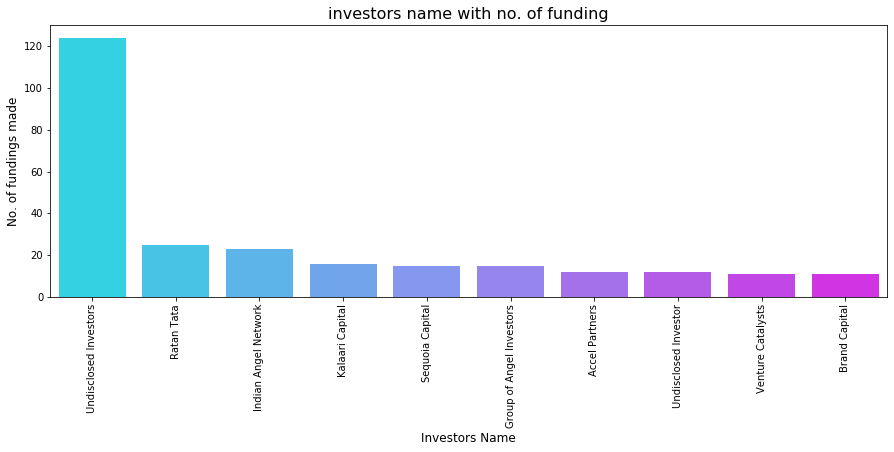

In [38]:
# plot data

sns.barplot(investors.index,investors.values,palette='cool')
plt.xticks(rotation='vertical')
plt.xlabel("Investors Name",fontsize=12)
plt.ylabel("No. of fundings made",fontsize=12)
plt.title("investors name with no. of funding",fontsize=16)
plt.show()

#  Different types of for startups

Private Equity        1357
Seed Funding          1355
Seed Angel Funding     138
Seed\\nFunding          30
Debt Funding            25
Series A                24
Series B                20
Series C                14
Series D                12
Seed Round               7
Name: InvestmentType, dtype: int64


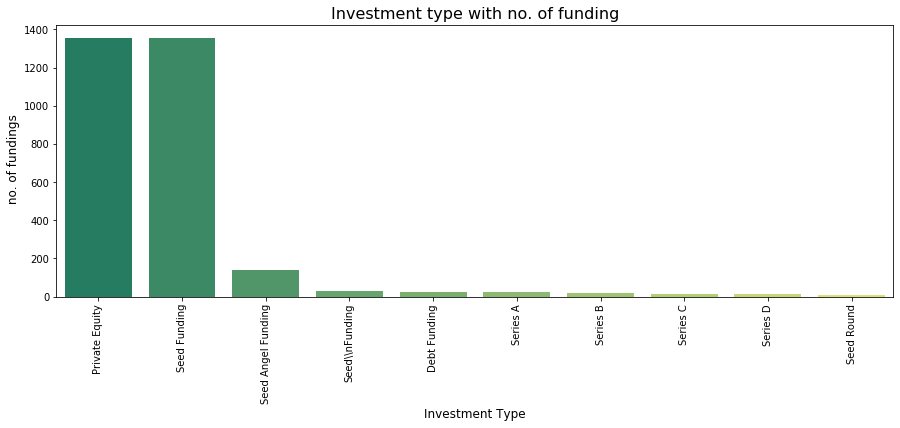

In [46]:
#analyze the investment
investment=df['InvestmentType'].value_counts().head(10)
print(investment)

# clean dataset
df['InvestmentType'][df['InvestmentType']=='SeedFunding']='Seed Funding'
df['InvestmentType'][df['InvestmentType']=='Seed\\nFunding']='Seed Funding'
df['InvestmentType'][df['InvestmentType']=='Crowd funding']='Crowd Funding'
df['InvestmentType'][df['InvestmentType']=='PrivateEquity']='Private Equity'
df['InvestmentType'][df['InvestmentType']=='Seed/ Angel Funding']='Seed Angel Funding'
df['InvestmentType'][df['InvestmentType']=='Seed/Angel Funding']='Seed Angel Funding'
df['InvestmentType'][df['InvestmentType']=='Seed / Angel Funding']='Seed Angel Funding'
df['InvestmentType'][df['InvestmentType']=='Angel / Seed Funding']='Seed Angel Funding'

# plot
sns.barplot(investment.index,investment.values,palette='summer')
plt.xticks(rotation='vertical')
plt.xlabel("Investment Type",fontsize=12)
plt.ylabel(" no. of fundings",fontsize=12)
plt.title("Investment type with no. of funding",fontsize=16)
plt.show()